In [20]:
import os
from time import time
from PIL import Image, ImageEnhance, ImageFilter
import numpy as np
from utils import helpers
from datasets.cityscapes import colorize_mask

np.set_printoptions(edgeitems=10)

In [4]:
palette = [128, 64, 128, 244, 35, 232, 70, 70, 70, 102, 102, 156, 190, 153, 153,
           153, 153, 153, 250, 170, 30,
           220, 220, 0, 107, 142, 35, 152, 251, 152, 70, 130, 180, 220, 20, 60,
           255, 0, 0, 0, 0, 142, 0, 0, 70,
           0, 60, 100, 0, 80, 100, 0, 0, 230, 119, 11, 32]

def colorize_mask(mask):
    """
    Colorize a segmentation mask.
    """
    # mask: numpy array of the mask
    new_mask = Image.fromarray(mask.astype(np.uint8)).convert('P')
    new_mask.putpalette(palette)
    return new_mask

In [3]:
net, img_transforms, args = helpers.setup_net('../models/kitti_best.pth')

Using regular batch norm
Net built.
Net restored.


# Subject Image

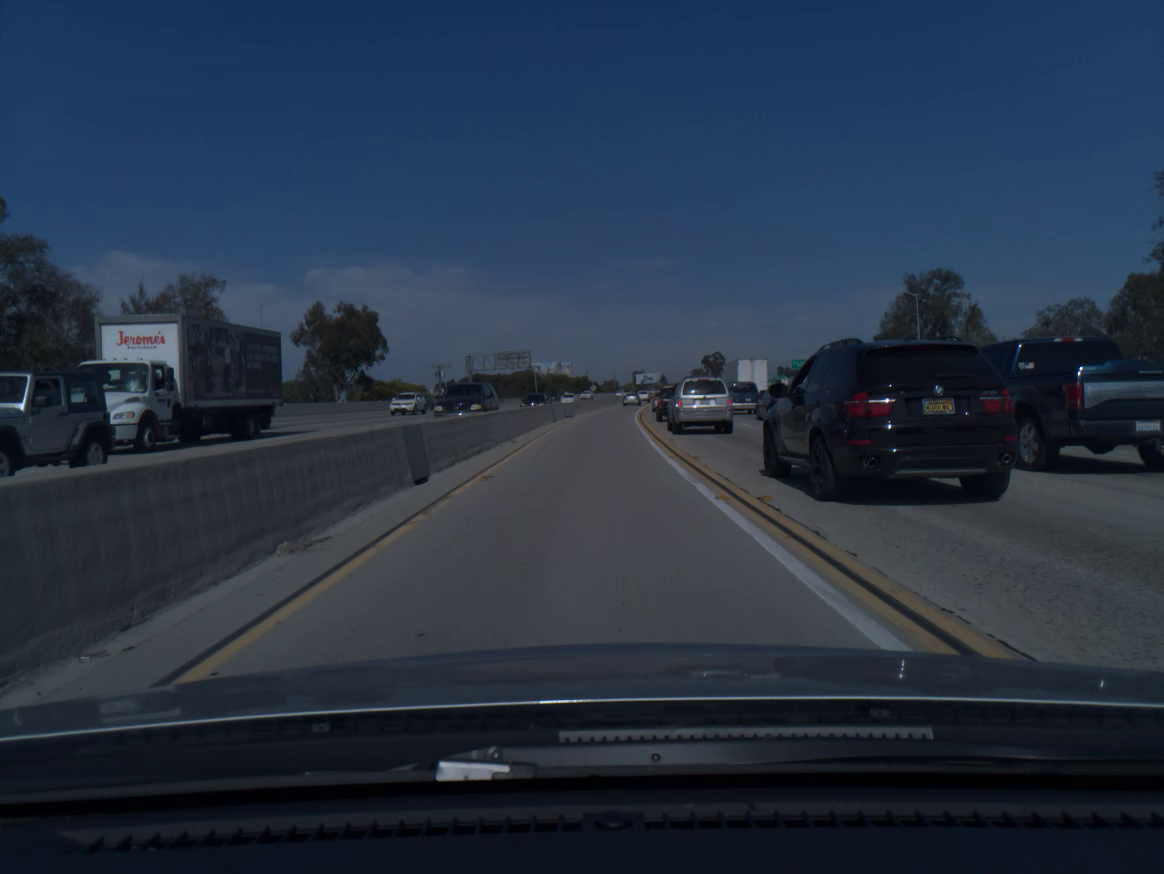

In [59]:
img = Image.open('comma10k/imgs/0005_836d09212ac1b8fa_2018-06-15--15-57-15_23_345.png')
img

# Raw Prediction

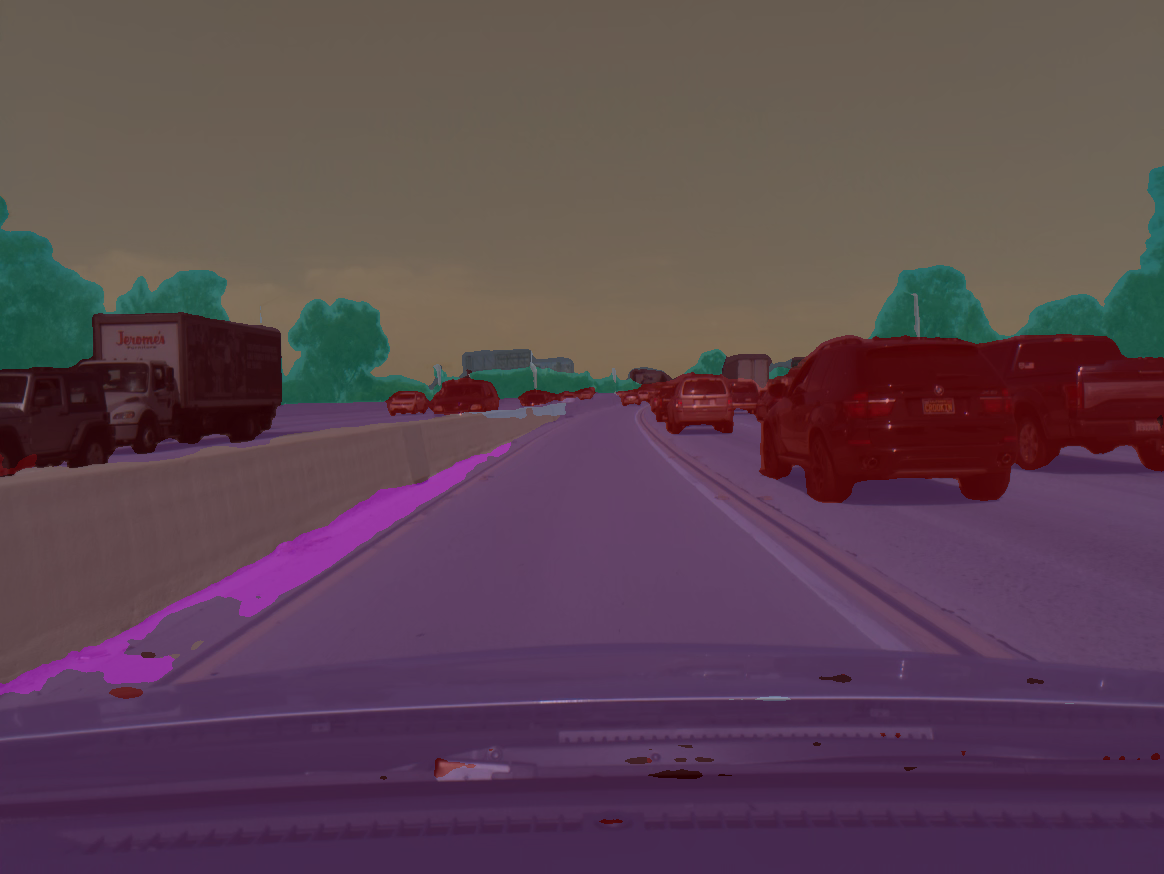

In [62]:
# our raw output

# x_np = np.load('comma10k/segz/0002_e8e95b54ed6116a6_2018-09-05--22-04-33_2_608.png.npz')
# x_np = x_np[x_np.files[0]]
x_img = np.array(img)
x_np_color, x_np = helpers.predict_image(net, img_transforms, args, x_img)
# x = colorize_mask(x_np)
# x = Image.fromarray(x)
x_color = Image.fromarray(x_np_color.astype(np.uint8))

background = img.copy()
foreground = x_color.copy()
foreground.putalpha(128)
background.paste(foreground, (0, 0), foreground)
background

# Cell Postprocess

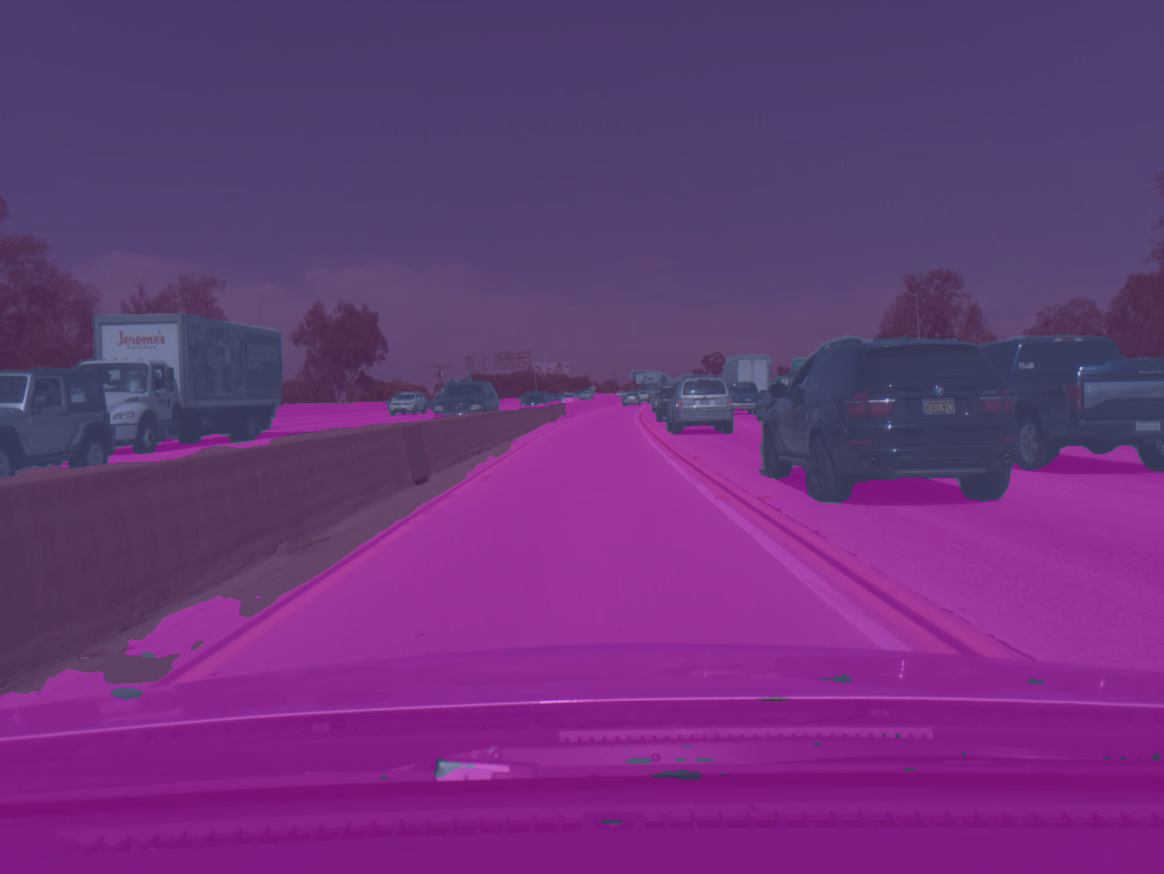

In [71]:
convert_dict = {
    0: 1,
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 0,
    7: 0,
    8: 0,
    9: 0,
    10: 0,
    11: 0, # revise
    12: 5, # revise
    13: 3,
    14: 3,
}

mapn = np.vectorize(lambda x: convert_dict[x])
mapped_x_np = mapn(x_np)
color_mapped = colorize_mask(mapped_x_np)

background = img.copy()
foreground = color_mapped.copy().convert('RGB')
foreground.putalpha(128)
background.paste(foreground, (0, 0), foreground)
background